# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Introduction</p></div>

#### A. Introduce the dataset

This dataset comprises yiarly data spanning from 2015 to 2021, encompassing all 34 provinces of Indonesia. The primary focus of this research is to investigate the facets of inclusive economic growth within the Indonesian context.

#### B. The purpose of the analysis

The analysis aims to understand the determinants of inclusive economic growth by examining various factors such as human capital development, public investment, and private investments. Specifically, it seeks to identify which variables contribute significantly to inclusive growth and which may hinder it.

#### C. The dataset's source and context

The dataset's source is derived from secondary data repositories, namely the Central Bureau of Statistics and the Directorate General of Financial Balance (DPJK). This dataset consists of annual data points. The study draws its definition of inclusive economic growth from the United Nations Development Programme (UNDP), emphasizing the importance of growth that benefits all segments of society, with a particular focus on employment as a key indicator of inclusivity.

In this context, the study employs the logarithm of GDP per person employed as a proxy for inclusive growth. This variable signifies the average opportunities available to the population and how these opportunities are distributed among the populace. The Central Bureau of Statistics defines GDP growth per person employed as the average real GDP growth rate relative to the number of people employed annually. A higher GDP growth rate per person employed corresponds to greater inclusive growth. Real GRDP is chosen as the metric due to the provincial-level focus, helping to eliminate the influence of inflation on economic growth.

Additionally, the study employs the high school attainment rate as a proxy for education level and measures health quality based on the percentage of the population with chronic and acute health complaints within a month. Public investment is represented by the logarithm of realized government capital expenditure, while private investment is measured by the logarithm of the sum of realized foreign direct investment and domestic investment. The study also considers structural transformation through the proportion of formal sector workers and trade openness using the proportion of total trade (both international and interprovincial) relative to GDP.

The research findings suggest that high school graduation rates, private investment, trade openness, and formal sector employment have statistically positive and significant impacts on inclusive growth. Conversely, health complaints exhibit a negative and significant impact, while public investment shows a negative but insignificant influence on inclusive growth. These outcomes emphasize the critical importance of human development, infrastructure development, and structural transformation as key policy areas for fostering inclusive growth within Indonesia.

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b> Import Modules</p></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
import math

rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Data Exploration</p></div>

### A. Load and inspect the dataset

In [2]:
# Read the Excel file
data = pd.read_excel('/kaggle/input/inclusive-economics-growth-determinants/Inclusive Economics Growth Determinants/clean_dat_inclusive growth determinants.xlsx')
data.head().style.set_properties(**{'background-color':'royalblue','color':'white','border-color':'#8b8c8c'})

,province,year,grdp_employed,grdp_capita,health_complaint,to,formal_sector,unemployed_percent,hdi,gov_spending,gov_capex,region,poverty,gini,decent_sanitation,clean_water,hs_graduation,agri,life_expectancy,grdp_nominal,population_thousand,private_invest,foreign_invest,domestic_invest
0,ACEH,2015,53.990600,22524.310000,27.920000,0.944478,0.395000,8.830000,69.450000,37549.690000,8553.030000,Indonesia Bagian Barat,17.095000,0.336500,54.680000,61.230000,68.160000,37598.849177,69.540000,129092659.010000,5018.700000,4457.400000,265.000000,4192.400000
1,ACEH,2016,56.680773,22835.290000,25.780000,0.902602,0.428300,7.850000,70.000000,42180.530000,9870.070000,Indonesia Bagian Barat,16.580000,0.337000,62.680000,63.310000,74.460000,40218.310849,69.565000,136843817.970000,5096.200000,4298.750000,1842.650000,2456.100000
2,ACEH,2017,56.179526,23362.900000,24.850000,0.920829,0.404200,6.980000,70.600000,43580.960000,8920.150000,Indonesia Bagian Barat,16.405000,0.329000,63.380000,64.850000,70.640000,43363.354290,69.585000,145806922.500000,5189.500000,1091.360000,308.560000,782.800000
3,ACEH,2018,56.608468,24013.790000,30.180000,0.903635,0.405600,6.440000,71.190000,38767.100000,6320.930000,Indonesia Bagian Barat,15.825000,0.321500,67.090000,66.480000,70.680000,46365.383165,69.700000,155910977.030000,5281.300000,1924.080000,954.080000,970.000000
4,ACEH,2019,55.897635,24842.300000,29.330000,0.880198,0.428800,5.825000,71.900000,45620.690000,8743.710000,Indonesia Bagian Barat,15.165000,0.320500,73.160000,85.810000,69.960000,48438.862870,69.915000,164162978.190000,5371.500000,5669.400000,2062.500000,3606.900000


### B. Display summary statistics and data types

In [3]:
data.describe().style.background_gradient(cmap='tab20c')

,year,grdp_employed,grdp_capita,health_complaint,to,formal_sector,unemployed_percent,hdi,gov_spending,gov_capex,poverty,gini,decent_sanitation,clean_water,hs_graduation,agri,life_expectancy,grdp_nominal,population_thousand,private_invest,foreign_invest,domestic_invest
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,237.000000
mean,2018.000000,87.037956,41367.929118,27.656092,0.994897,0.411494,5.074370,70.193950,31563.820252,5834.671471,10.944244,0.355137,71.055882,76.736345,60.564832,54717.378511,69.721134,427581152.980168,7783.127731,21461.778487,12076.276807,9425.102954
std,2.004215,66.586244,31107.031730,5.759931,0.554802,0.109111,1.780802,4.090589,28060.220933,4343.282441,5.729250,0.037733,14.426834,12.449483,11.517124,61745.474476,2.583414,614307418.625468,10957.462192,27565.508826,16666.272425,13022.399008
min,2015.000000,24.284207,11087.910000,12.740000,0.175277,0.185100,1.140000,57.250000,1663.050000,1054.570000,3.445000,0.251500,23.900000,37.350000,27.440000,1863.907693,64.270000,26638303.080000,644.500000,180.550000,25.000000,8.800000
25%,2016.000000,51.244939,24870.127500,24.502500,0.667463,0.352750,3.693750,68.282500,14108.310000,2844.897500,6.408750,0.328125,63.737500,67.345000,54.180000,15587.644021,68.183750,97478617.302500,2105.000000,4258.962500,1351.052500,1356.800000
50%,2018.000000,67.379318,32159.545000,27.915000,0.902221,0.394050,4.632500,70.255000,22588.845000,4530.605000,9.200000,0.352750,72.675000,76.370000,60.900000,30093.300212,69.900000,176953160.745000,4064.550000,10914.860000,5343.780000,4183.700000
75%,2020.000000,79.282285,38675.220000,31.090000,1.192655,0.456950,6.223750,71.922500,37340.197500,7061.600000,14.028750,0.384875,80.927500,88.162500,67.555000,57630.273530,71.275000,474919016.682500,8194.050000,25890.900000,15442.005000,10513.200000
max,2021.000000,378.129073,174962.980000,44.390000,3.854829,0.729600,10.015000,81.110000,130637.220000,21119.930000,28.470000,0.438500,97.120000,99.860000,90.120000,282386.484143,75.080000,2914581082.810000,49316.700000,137499.200000,88215.000000,62094.800000


In [4]:
data_types = data.dtypes
print("\nData Types:")
print(data_types)


Data Types:
province                object
year                     int64
grdp_employed          float64
grdp_capita            float64
health_complaint       float64
to                     float64
formal_sector          float64
unemployed_percent     float64
hdi                    float64
gov_spending           float64
gov_capex              float64
region                  object
poverty                float64
gini                   float64
decent_sanitation      float64
clean_water            float64
hs_graduation          float64
agri                   float64
life_expectancy        float64
grdp_nominal           float64
population_thousand    float64
private_invest         float64
foreign_invest         float64
domestic_invest        float64
dtype: object


### C. Check for missing values and handle them if necessary

In [5]:
missing_values = data.isnull().sum()
# If there are missing values, you can handle them by dropping rows or filling missing values with appropriate strategies.

print("\nMissing Values:")
print(missing_values)


Missing Values:
province               0
year                   0
grdp_employed          0
grdp_capita            0
health_complaint       0
to                     0
formal_sector          0
unemployed_percent     0
hdi                    0
gov_spending           0
gov_capex              0
region                 0
poverty                0
gini                   0
decent_sanitation      0
clean_water            0
hs_graduation          0
agri                   0
life_expectancy        0
grdp_nominal           0
population_thousand    0
private_invest         0
foreign_invest         0
domestic_invest        1
dtype: int64


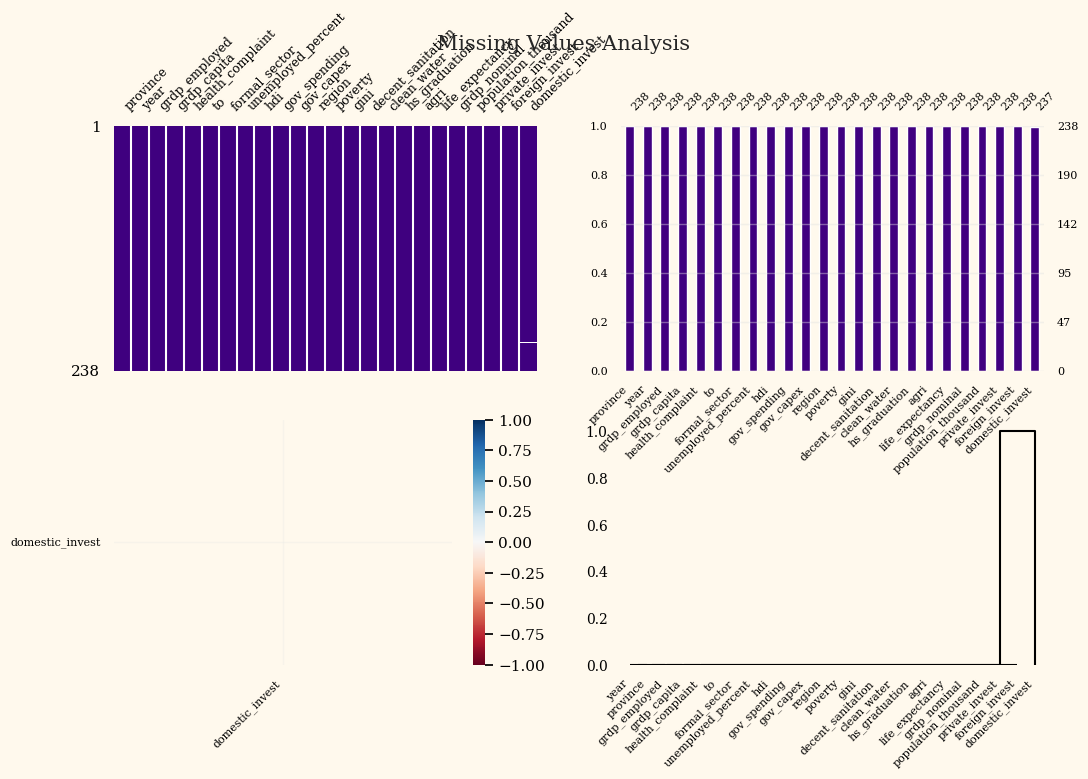

In [6]:
import missingno as msno

fig, ax = plt.subplots(2,2,figsize=(12,7))
axs = np.ravel(ax)
msno.matrix(data,  fontsize=9, color=(0.25,0,0.5),ax=axs[0]);
msno.bar(data, fontsize=8, color=(0.25,0,0.5), ax=axs[1]);
msno.heatmap(data,fontsize=8,ax=axs[2]);
msno.dendrogram(data,fontsize=8,ax=axs[3], orientation='top')

fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15);


### D. Identify and handle any duplicate records

In [7]:
duplicate_records = data[data.duplicated()]
# If there are duplicate records, you can choose to drop them using data.drop_duplicates()

print("\nDuplicate Records:")
print(duplicate_records)



Duplicate Records:
Empty DataFrame
Columns: [province, year, grdp_employed, grdp_capita, health_complaint, to, formal_sector, unemployed_percent, hdi, gov_spending, gov_capex, region, poverty, gini, decent_sanitation, clean_water, hs_graduation, agri, life_expectancy, grdp_nominal, population_thousand, private_invest, foreign_invest, domestic_invest]
Index: []

[0 rows x 24 columns]


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Data Preprocessing</p></div>

### A. Data Cleaning

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler  # For scaling/normalization

# 1. Address any inconsistencies or anomalies in the data
# In this example, we'll assume there are no specific inconsistencies or anomalies.
# You may need to perform additional data cleaning based on your specific dataset.

# 2. Convert data types if needed
# Check the data types and convert them as necessary (e.g., date columns to datetime).
data['year'] = pd.to_datetime(data['year'], format='%Y')


### B. Feature Selection
  

In [9]:
# 1. Determine which columns are relevant for the analysis
# Decide which columns are relevant based on your analysis objectives.
selected_columns = ['province', 'year', 'grdp_employed', 'grdp_capita', 'health_complaint', 'to_formal_sector',
                    'unemployed_percent', 'hdi', 'gov_spending', 'decent_sanitation', 'clean_water', 'hs_graduation',
                    'agri', 'life_expectancy', 'grdp_nominal', 'population_thousand', 'private_invest',
                    'foreign_invest', 'domestic_invest']


### C. Feature Engineering


In [10]:
# 1. Create new features if they add value to the analysis
# You can create new features based on domain knowledge or specific analysis requirements.
# For example, you can create a 'total_investment' feature by summing 'private_invest', 'foreign_invest', and 'domestic_invest'.
data['total_investment'] = data['private_invest'] + data['foreign_invest'] + data['domestic_invest']


### D. Scaling/Normalization (if required)
  

In [11]:
# 1. Scale or normalize numerical features as needed
# If you have numerical features that need scaling or normalization, you can use StandardScaler or other methods.
numeric_columns = ['grdp_employed', 'grdp_capita', 'health_complaint',
                   'unemployed_percent', 'hdi', 'gov_spending', 'decent_sanitation', 'clean_water', 'hs_graduation',
                   'agri', 'life_expectancy', 'grdp_nominal', 'population_thousand', 'private_invest',
                   'foreign_invest', 'domestic_invest', 'total_investment']

scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Print the preprocessed dataset
print("Preprocessed Dataset:")
data.head().style.set_properties(**{'background-color':'lightgreen','color':'royalblue','border-color':'#8b8c8c'})

Preprocessed Dataset:


,province,year,grdp_employed,grdp_capita,health_complaint,to,formal_sector,unemployed_percent,hdi,gov_spending,gov_capex,region,poverty,gini,decent_sanitation,clean_water,hs_graduation,agri,life_expectancy,grdp_nominal,population_thousand,private_invest,foreign_invest,domestic_invest,total_investment
0,ACEH,2015-01-01 00:00:00,-0.497355,-0.607044,0.045914,0.944478,0.395000,2.113399,-0.182252,0.213772,8553.030000,Indonesia Bagian Barat,17.095000,0.336500,-1.137491,-1.248166,0.660857,-0.277828,-0.070262,-0.486918,-0.252819,-0.618172,-0.710187,-0.402674,-0.620722
1,ACEH,2016-01-01 00:00:00,-0.456869,-0.597026,-0.326401,0.902602,0.428300,1.561926,-0.047514,0.379152,9870.070000,Indonesia Bagian Barat,16.580000,0.337000,-0.581800,-1.080739,1.209022,-0.235315,-0.060565,-0.474274,-0.245731,-0.623939,-0.615326,-0.536288,-0.626484
2,ACEH,2017-01-01 00:00:00,-0.464412,-0.580029,-0.488201,0.920829,0.404200,1.072352,0.099474,0.429165,8920.150000,Indonesia Bagian Barat,16.405000,0.329000,-0.533177,-0.956778,0.876643,-0.184272,-0.052807,-0.459653,-0.237199,-0.740540,-0.707568,-0.665054,-0.742975
3,ACEH,2018-01-01 00:00:00,-0.457957,-0.559060,0.439107,0.903635,0.405600,0.768479,0.244011,0.257249,6320.930000,Indonesia Bagian Barat,15.825000,0.321500,-0.275476,-0.825573,0.880123,-0.135550,-0.008198,-0.443170,-0.228803,-0.710267,-0.668754,-0.650648,-0.712731
4,ACEH,2019-01-01 00:00:00,-0.468655,-0.532370,0.291225,0.880198,0.428800,0.422401,0.417946,0.502009,8743.710000,Indonesia Bagian Barat,15.165000,0.320500,0.146155,0.730374,0.817476,-0.101898,0.075201,-0.429709,-0.220554,-0.574111,-0.602107,-0.447730,-0.576703


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Data Visualization</p></div>

### A. Generate visualizations to gain insights into the dataset
  

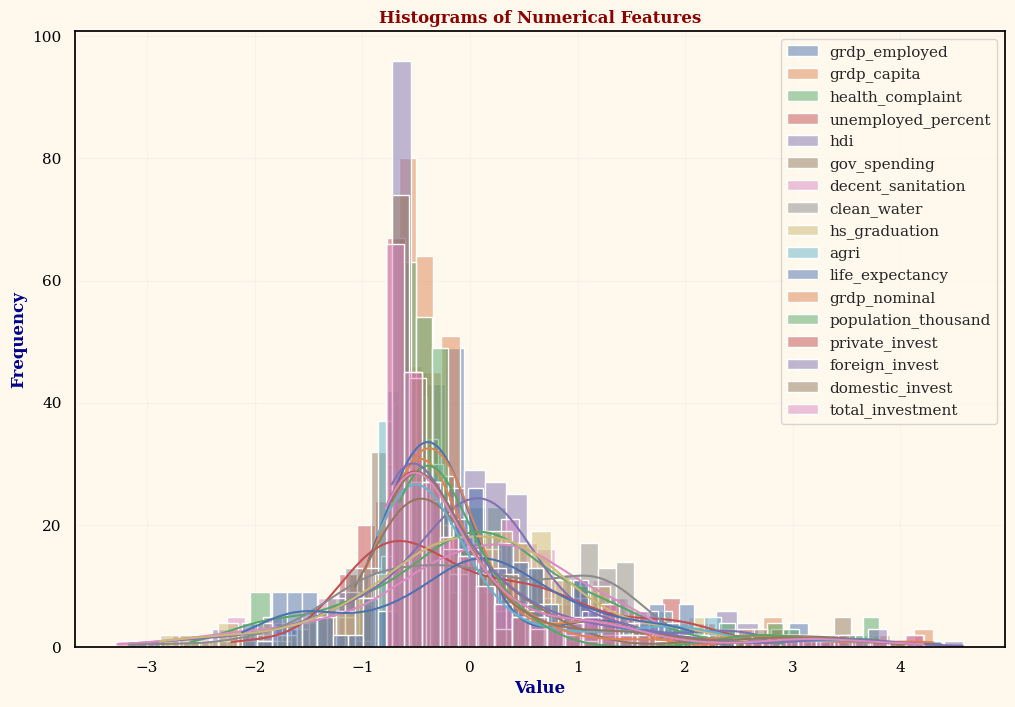

In [12]:
# Histograms
plt.figure(figsize=(12, 8))
for col in numeric_columns:
    sns.histplot(data[col], kde=True, label=col, bins=30)
plt.title("Histograms of Numerical Features", fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.xlabel("Value", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Frequency", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.legend()
plt.savefig('Histograms of Numerical Features.png')
plt.show()

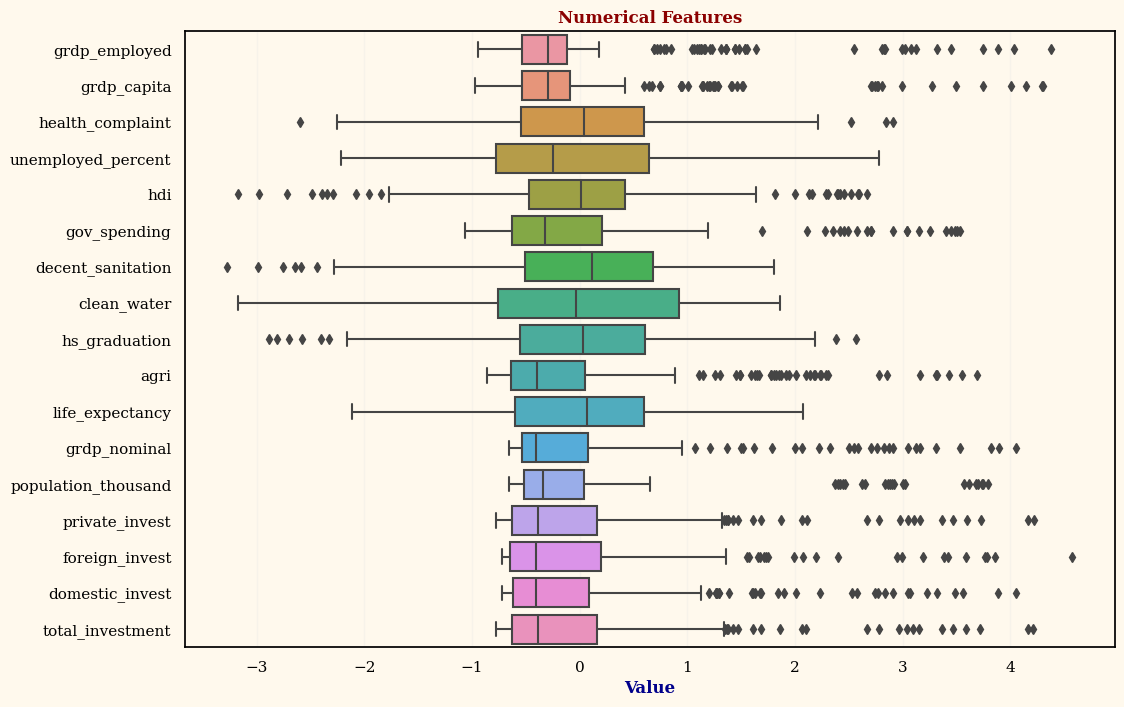

In [13]:
# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_columns], orient="h")
plt.title("Numerical Features", fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.xlabel("Value", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Numerical Features.png')
plt.show()

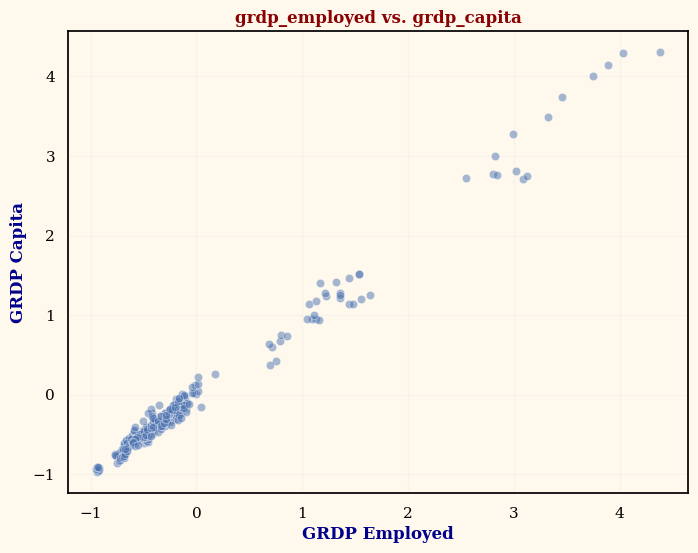

In [14]:
# grdp_employed vs. grdp_capita
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='grdp_employed', y='grdp_capita', alpha=0.5)
plt.title("grdp_employed vs. grdp_capita", fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.xlabel("GRDP Employed", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("GRDP Capita", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('grdp_employed vs. grdp_capita.png')
plt.show()

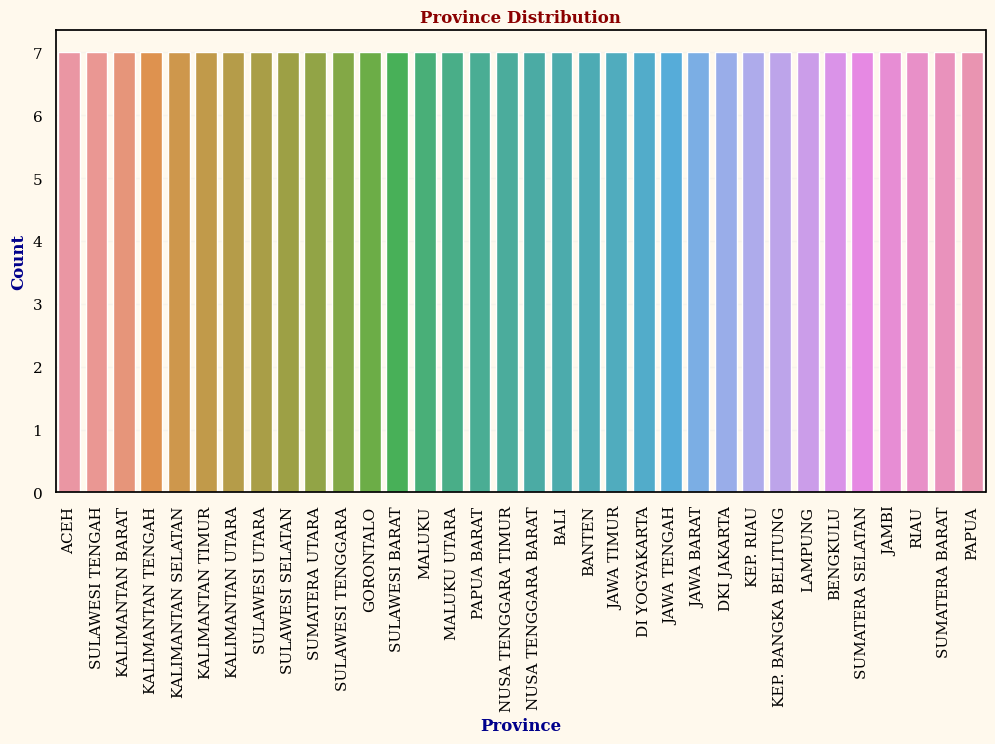

In [15]:
# Bar charts for categorical features (if any)
# Province distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='province', order=data['province'].value_counts().index)
plt.title("Province Distribution", fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.xlabel("Province", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Count", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=90)
plt.savefig('Province Distribution.png')
plt.show()


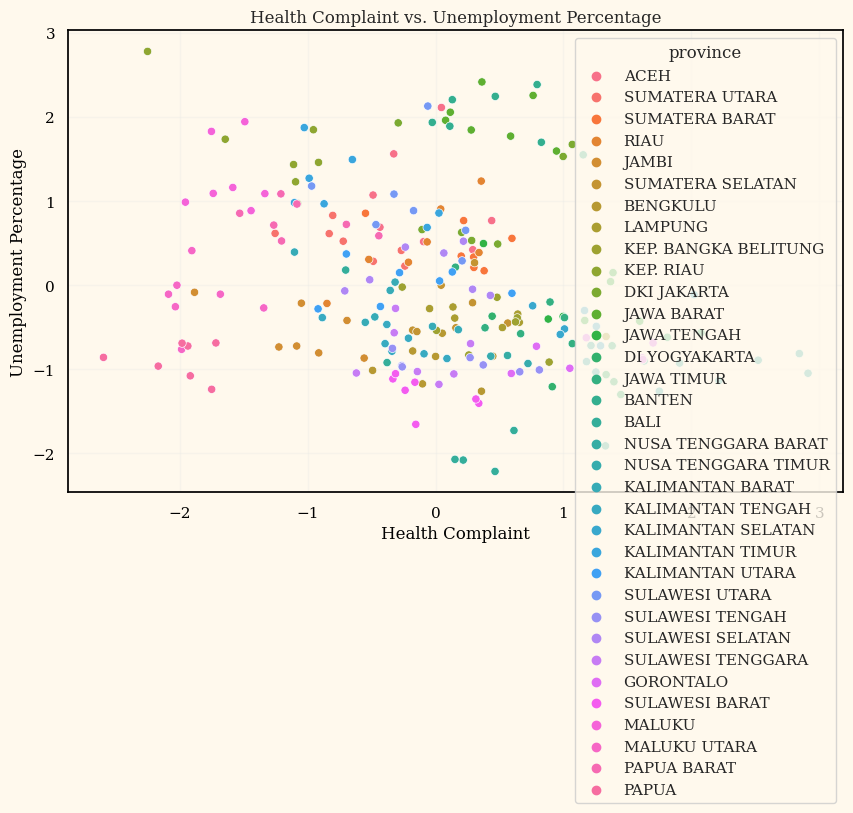

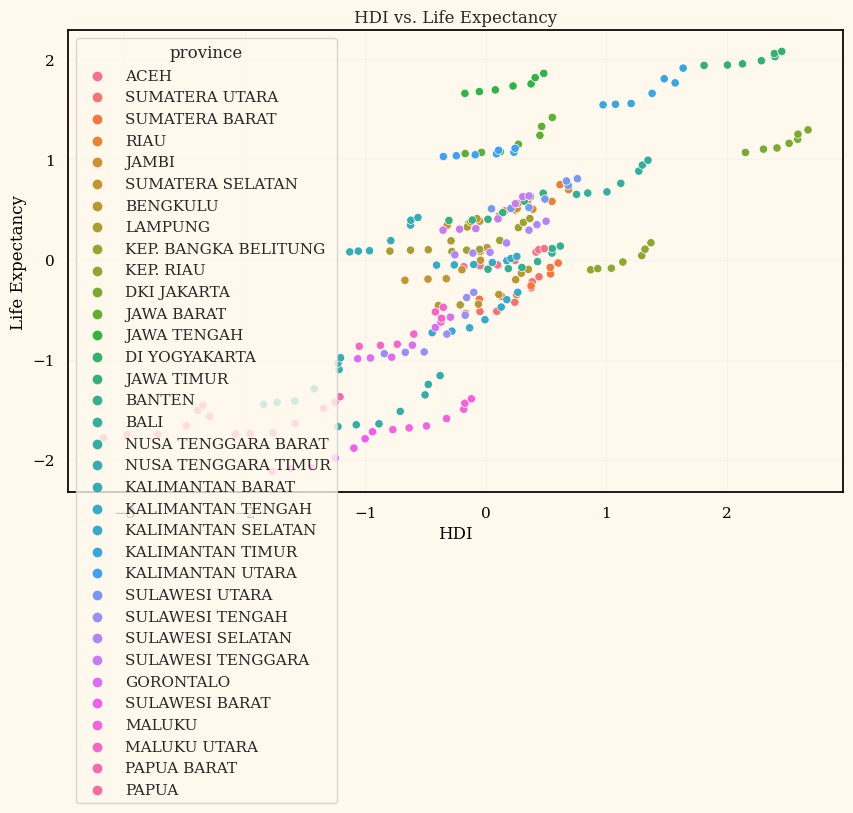

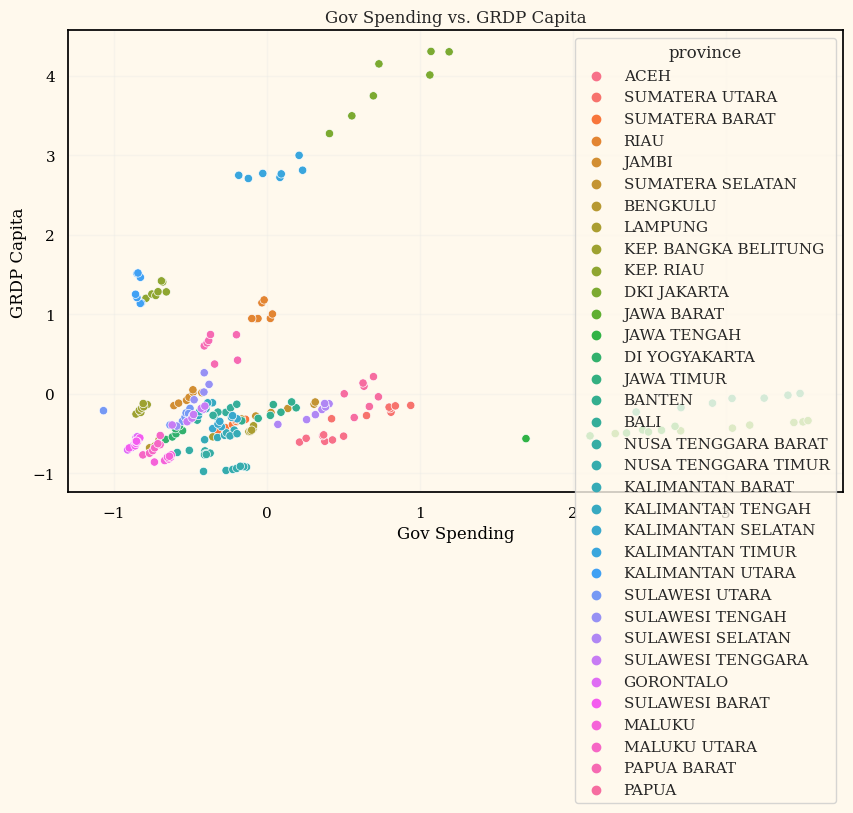

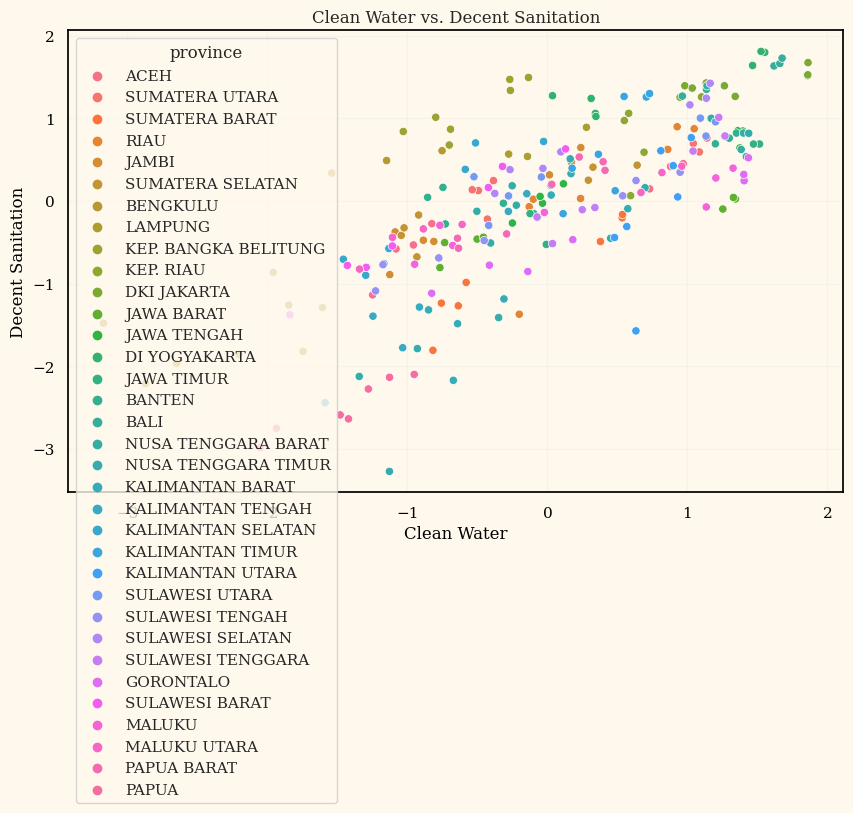

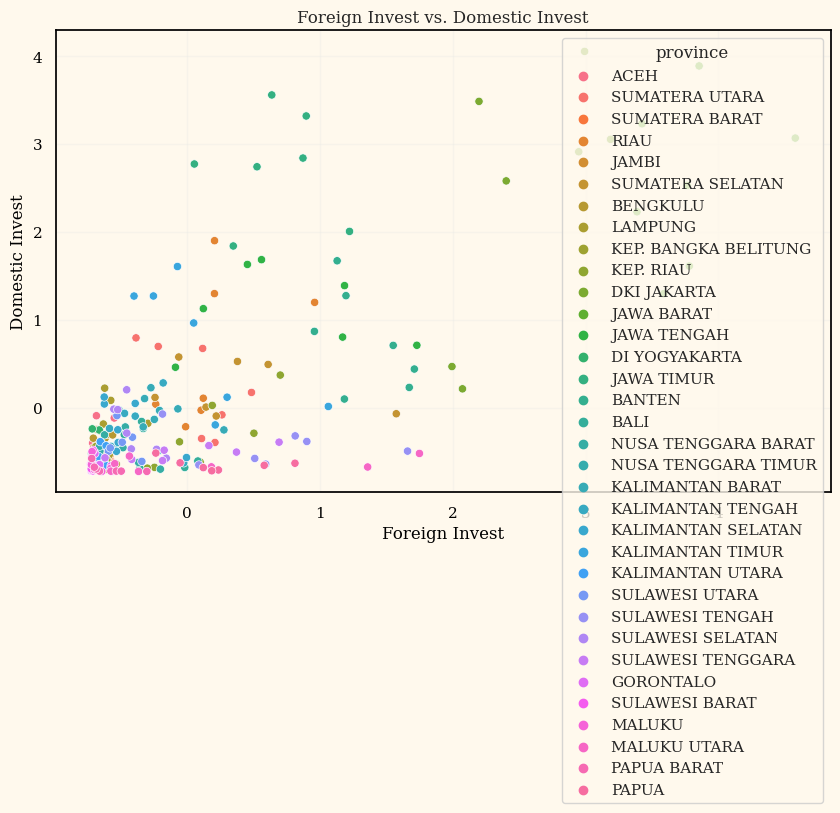

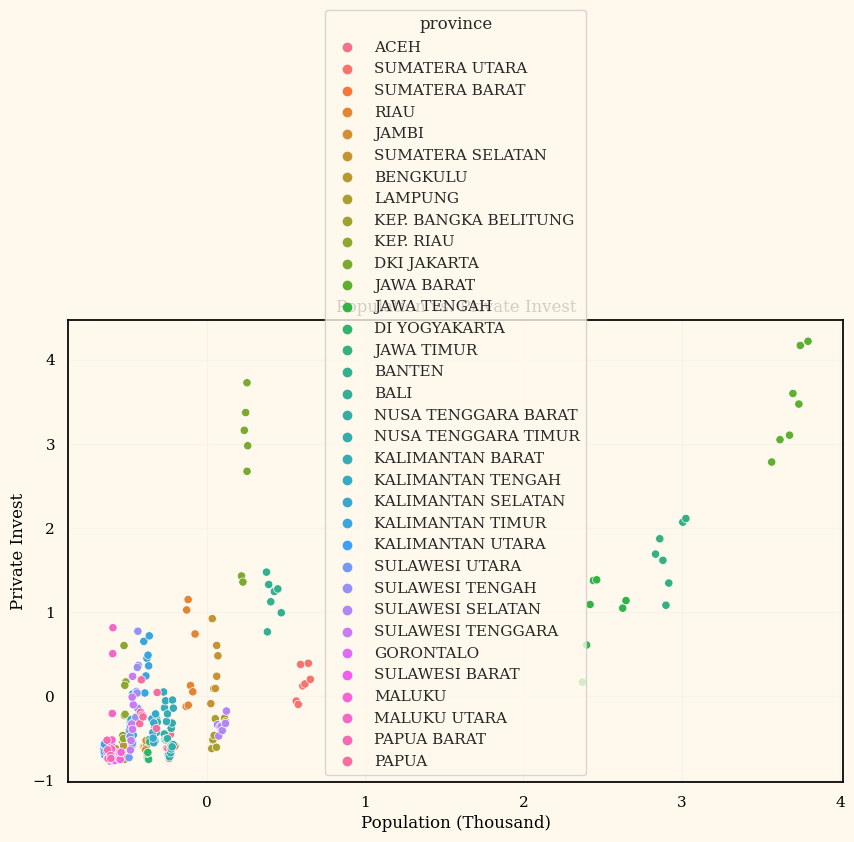

In [16]:
# Let's set a color palette
sns.set_palette("husl")

# Health Complaint vs. Unemployment Percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='health_complaint', y='unemployed_percent', data=data, hue='province')
plt.title('Health Complaint vs. Unemployment Percentage')
plt.xlabel('Health Complaint')
plt.ylabel('Unemployment Percentage')
plt.show()

# HDI (Human Development Index) vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hdi', y='life_expectancy', data=data, hue='province')
plt.title('HDI vs. Life Expectancy')
plt.xlabel('HDI')
plt.ylabel('Life Expectancy')
plt.show()

# Gov Spending vs. GRDP Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gov_spending', y='grdp_capita', data=data, hue='province')
plt.title('Gov Spending vs. GRDP Capita')
plt.xlabel('Gov Spending')
plt.ylabel('GRDP Capita')
plt.show()

# PClean Water vs. Decent Sanitation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='clean_water', y='decent_sanitation', data=data, hue='province')
plt.title('Clean Water vs. Decent Sanitation')
plt.xlabel('Clean Water')
plt.ylabel('Decent Sanitation')
plt.show()

# Foreign Invest vs. Domestic Invest
plt.figure(figsize=(10, 6))
sns.scatterplot(x='foreign_invest', y='domestic_invest', data=data, hue='province')
plt.title('Foreign Invest vs. Domestic Invest')
plt.xlabel('Foreign Invest')
plt.ylabel('Domestic Invest')
plt.show()

# Population vs. Private Invest
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population_thousand', y='private_invest', data=data, hue='province')
plt.title('Population vs. Private Invest')
plt.xlabel('Population (Thousand)')
plt.ylabel('Private Invest')
plt.show()

### B. Explore relationships between variables through correlation matrices and heatmaps

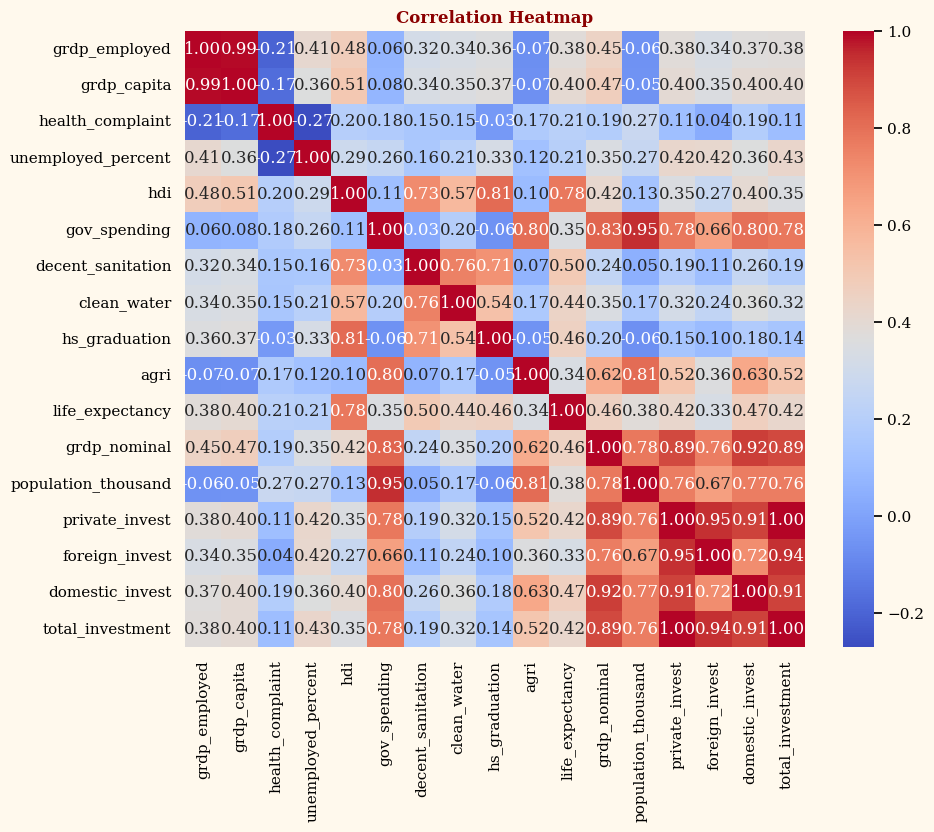

Correlation Matrix:
                     grdp_employed  grdp_capita  health_complaint  \
grdp_employed             1.000000     0.993727         -0.205208   
grdp_capita               0.993727     1.000000         -0.172580   
health_complaint         -0.205208    -0.172580          1.000000   
unemployed_percent        0.412764     0.364122         -0.269881   
hdi                       0.476459     0.505497          0.200457   
gov_spending              0.063583     0.076254          0.177521   
decent_sanitation         0.315734     0.339846          0.154307   
clean_water               0.338055     0.352168          0.147087   
hs_graduation             0.358666     0.372104         -0.032100   
agri                     -0.068876    -0.065717          0.173796   
life_expectancy           0.384271     0.402495          0.206523   
grdp_nominal              0.445478     0.470728          0.190382   
population_thousand      -0.061486    -0.053594          0.271614   
private_invest

In [17]:
# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.savefig('Correlation Heatmap.png')
plt.show()

# Print the correlation values
print("Correlation Matrix:")
print(correlation_matrix)


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Data Analysis</p></div>

### A. Descriptive Statistics
  ### 1. Calculate and interpret statistics for key variables

In [18]:
# Calculate and interpret statistics for key variables
key_variables = ['grdp_employed', 'grdp_capita', 'unemployed_percent', 'hdi', 'health_complaint']

# Summary statistics
data[key_variables].describe().style.background_gradient(cmap='tab20c')

,grdp_employed,grdp_capita,unemployed_percent,hdi,health_complaint
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,-0.000000,0.000000,0.000000,-0.000000,0.000000
std,1.002107,1.002107,1.002107,1.002107,1.002107
min,-0.944429,-0.975465,-2.213981,-3.170993,-2.595088
25%,-0.538677,-0.531474,-0.776914,-0.468265,-0.548659
50%,-0.295858,-0.296646,-0.248653,0.014956,0.045044
75%,-0.116721,-0.086745,0.646789,0.423458,0.597428
max,4.380854,4.303741,2.780232,2.674201,2.911350


### B. Time Trends

  ### 1. Analyze trends over the years (e.g., GRDP, unemployment, health complaints)

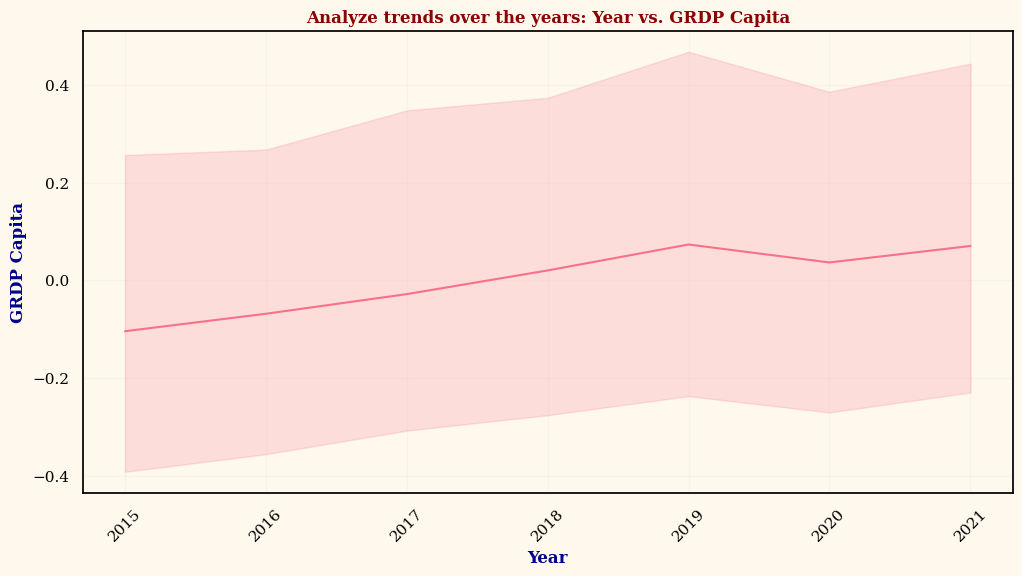

In [19]:
# Analyze trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='grdp_capita')
plt.title("Analyze trends over the years: Year vs. GRDP Capita", fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.xlabel("Year", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("GRDP Capita", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=45)
plt.savefig('Analyze trends over the years:Year vs. GRDP Capita.png')
plt.show()

### C. Regional Differences 

  ### 1. Compare provinces using relevant metrics


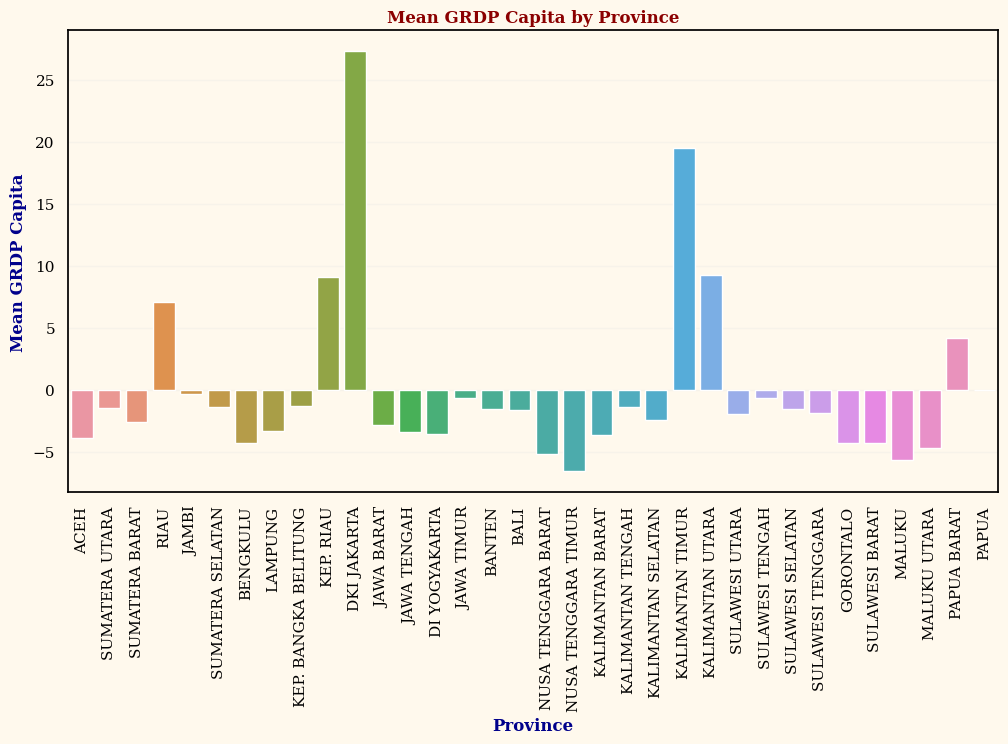

In [20]:
# Compare provinces using relevant metrics (e.g., mean GRDP Capita by province)
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='province', y='grdp_capita', ci=None, estimator=sum)
plt.title("Mean GRDP Capita by Province", fontsize = 12, fontweight = 'bold', color = 'darkred')
plt.xlabel("Province", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Mean GRDP Capita", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=90)
plt.savefig('Mean GRDP Capita by Province.png')
plt.show()


### D. Hypothesis Testing (if applicable)

  ### 1. Perform statistical tests to validate hypotheses

In [21]:
# Perform a hypothesis test (e.g., t-test) to compare two groups
province_A = data[data['province'] == 'ACEH']['grdp_capita']
province_B = data[data['province'] == 'BALI']['grdp_capita']

# Perform an independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(province_A, province_B, equal_var=False)

# Print the results
print("Hypothesis Testing Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation: If p-value is less than a chosen significance level (e.g., 0.05), you can reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the two provinces.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two provinces.")


Hypothesis Testing Results:
T-statistic: -11.293135455146947
P-value: 1.035851850157801e-06
Reject the null hypothesis: There is a significant difference between the two provinces.


<div class="alert alert-block alert-info"> 📌 "Hey there! Your positive feedback and support for my notebook mean the world to me! It motivates me to create more valuable content. If you can spare a moment to give it an upvote, it would help others discover and benefit from it too. Together, let's foster a vibrant community of knowledge-sharing and empowerment. Thank you for considering it, and continued success on your learning journey!"</div>